# ***Data Analysis***
#***YAHOO Finance Stock dataset Statistical analysis - Laptev Oleg, gr.4167, RCSE-GRIAT***

> Working with CSV format Yahoo Finance Inc. dataset made for the dash-demo application

> Using: *Matplotlib,Pandas,Statsmodels API,ARIMA,ANOVA,K-MEANS,Regression and Classification models, Clustering*





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Preparing the data**

In [2]:
!pip3 install pmdarima

     |████████████████████████████████| 1.5MB 12.4MB/s 


In [0]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [4]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=641cc4258e82ce86a71764d9eebd3f8e8cb54367d9669d164d2ebe2e91b59996
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [5]:
df = pd.read_csv(r'/content/drive/My Drive/prices.csv')
df

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [6]:
df['date']

0         2016-01-05 00:00:00
1         2016-01-06 00:00:00
2         2016-01-07 00:00:00
3         2016-01-08 00:00:00
4         2016-01-11 00:00:00
                 ...         
851259             2016-12-30
851260             2016-12-30
851261             2016-12-30
851262    2016-12-30 00:00:00
851263    2016-12-30 00:00:00
Name: date, Length: 851264, dtype: object

In [7]:
df

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [0]:
from datetime import datetime
con=df['date']
df['date']=pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
#check datatype of index


In [0]:
df=df.sort_values(by='date')

In [10]:
df

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,SYMC,18.040001,18.400000,18.010000,18.530001,8322300.0
2010-01-04,IFF,41.509998,42.009998,41.500000,42.020000,286000.0
2010-01-04,ILMN,31.120001,30.549999,30.420000,31.230000,1793700.0
2010-01-04,INTC,20.790001,20.879999,20.730000,21.030001,47800900.0
2010-01-04,INTU,31.090000,30.809999,30.770000,31.150000,2353000.0
...,...,...,...,...,...,...
2016-12-30,ES,55.599998,55.230000,55.070000,55.740002,1446800.0
2016-12-30,EQT,65.699997,65.400002,65.050003,66.470001,1242100.0
2016-12-30,EQR,63.590000,64.360001,63.189999,64.440002,1534000.0


In [0]:
df1=df.loc[df['symbol']=='WMT']


In [12]:
df1

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,WMT,53.740002,54.230000,53.669998,54.669998,20753100.0
2010-01-05,WMT,54.090000,53.689999,53.570000,54.189999,15648400.0
2010-01-06,WMT,53.500000,53.570000,53.419998,53.830002,12517200.0
2010-01-07,WMT,53.720001,53.599998,53.259998,53.750000,10662700.0
2010-01-08,WMT,53.430000,53.330002,53.020000,53.529999,11363200.0
...,...,...,...,...,...,...
2016-12-23,WMT,69.430000,69.540001,69.360001,69.750000,4795400.0
2016-12-27,WMT,69.300003,69.699997,69.250000,69.820000,4428000.0
2016-12-28,WMT,69.940002,69.309998,69.260002,70.000000,4802900.0


In [0]:
dfopen=df1['open']


In [0]:

df1['year'] = df1.index.year
df1['month'] = df1.index.month
df1['day'] = df1.index.day



> Display a random sampling of 5 rows



In [15]:

df1.sample(5, random_state=0)

,symbol,open,close,low,high,volume,year,month,day
date,,,,,,,,,
2014-08-20,WMT,74.830002,74.959999,74.510002,75.050003,4898300.0,2014,8,20
2012-08-27,WMT,72.169998,72.500000,72.070000,72.790001,5766900.0,2012,8,27
2011-08-22,WMT,52.240002,52.189999,52.080002,52.639999,13771300.0,2011,8,22
2012-03-21,WMT,60.450001,60.560001,60.369999,60.720001,7302800.0,2012,3,21
2015-05-07,WMT,77.730003,78.029999,77.300003,78.339996,5538100.0,2015,5,7


In [0]:
df.columns = df.columns.get_level_values(0)

In [17]:
df.columns

Index(['symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

In [0]:
df.columns = [' '.join(col).strip() for col in df.columns.values]

In [19]:
df

,s y m b o l,o p e n,c l o s e,l o w,h i g h,v o l u m e
date,,,,,,
2010-01-04,SYMC,18.040001,18.400000,18.010000,18.530001,8322300.0
2010-01-04,IFF,41.509998,42.009998,41.500000,42.020000,286000.0
2010-01-04,ILMN,31.120001,30.549999,30.420000,31.230000,1793700.0
2010-01-04,INTC,20.790001,20.879999,20.730000,21.030001,47800900.0
2010-01-04,INTU,31.090000,30.809999,30.770000,31.150000,2353000.0
...,...,...,...,...,...,...
2016-12-30,ES,55.599998,55.230000,55.070000,55.740002,1446800.0
2016-12-30,EQT,65.699997,65.400002,65.050003,66.470001,1242100.0
2016-12-30,EQR,63.590000,64.360001,63.189999,64.440002,1534000.0


In [20]:
df.describe()

,o p e n,c l o s e,l o w,h i g h,v o l u m e
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


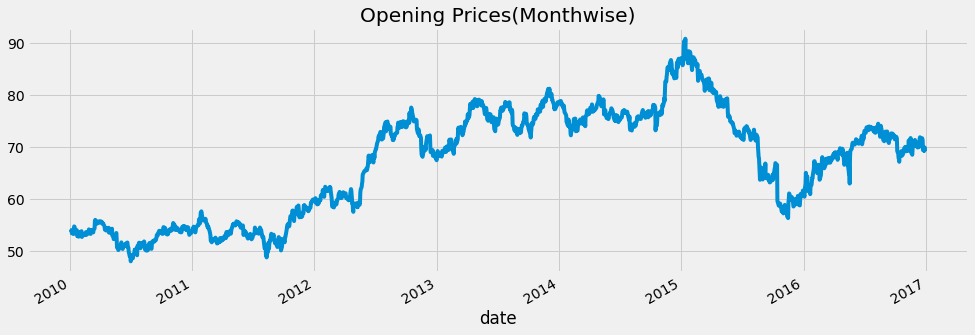

In [21]:
temp=df1.groupby(['date'])['open'].mean() 
temp.plot(figsize=(15,5), title= 'Opening Prices(Monthwise)', fontsize=14)

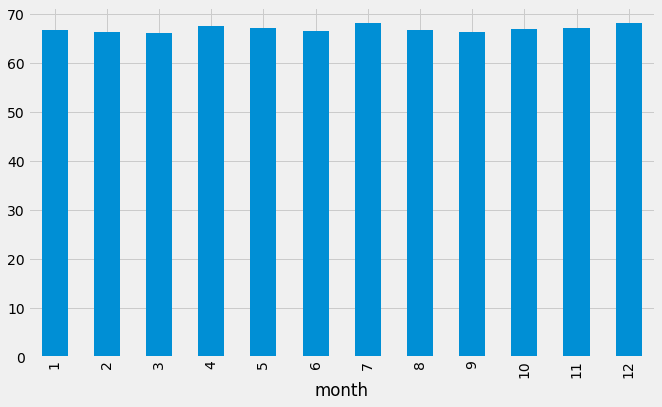

In [22]:
df1.groupby('month')['open'].mean().plot.bar()

In [0]:
dfopen=df1['open'].loc[:'20140530']

count    1109.000000
mean       63.706231
std        10.330069
min        48.099998
25%        53.840000
50%        60.230000
75%        74.320000
max        81.209999
Name: open, dtype: float64

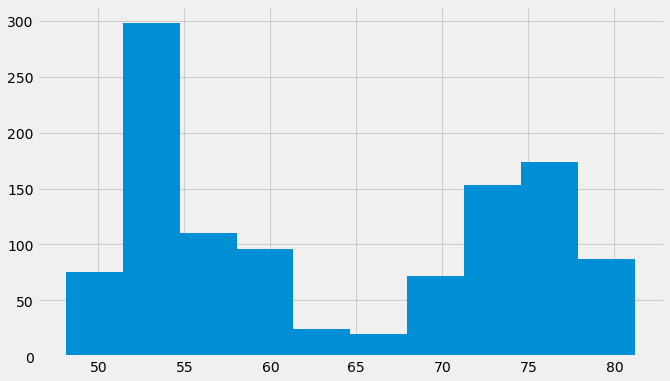

In [24]:
histogram=dfopen.describe()
dfopen.hist()
histogram

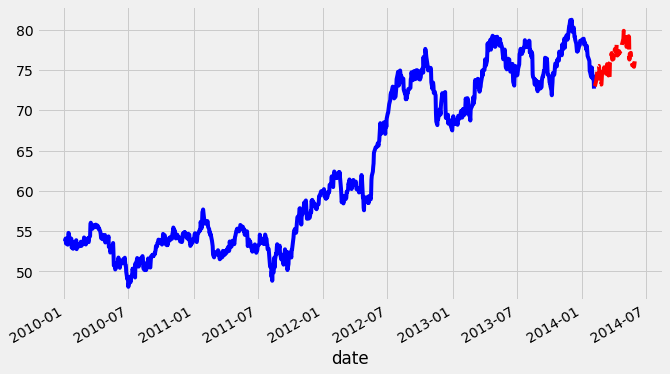

In [25]:
test = dfopen[1030:]
train = dfopen[:1029]
train.plot(style='b-')
test.plot(style='r--')

In [0]:
def test_stationarity(timeseries):
 #Determing rolling statistics
 rolmean = timeseries.rolling(12).mean()
 rolstd = timeseries.rolling(12).std()
 #Plot rolling statistics:
 plt.plot(timeseries, color='blue',label='Original')
 plt.plot(rolmean, color='orange', label='Rolling mean')
 plt.plot(rolstd, color='black', label = 'Rolling std')
 plt.legend(loc='Best')
 plt.title('Rolling Mean and Standard Deviation')
 plt.show(block=False)
 
 print("Results of Dickey-Fuller ")
 adftest = adfuller(timeseries,autolag='AIC')
 # output for adft will give us without defining what the values are.
 #hence we manually write what values does it explain using a for loop
 output = pd.Series(adftest[0:4],index=['Test stat.','p-value','Num. of lags used','Num of observations used'])
 for key,values in adftest[4].items():
  output['critical value (%s)'%key] = values
 print(output)



> Test the data by algorithm



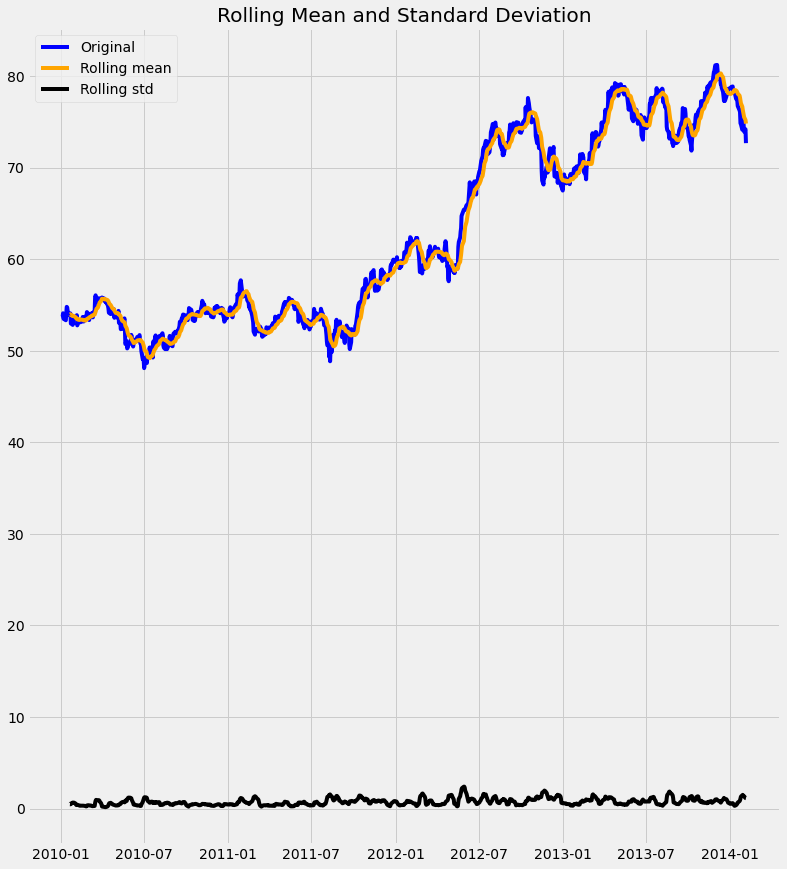

Results of Dickey-Fuller 
Test stat.                    -0.850521
p-value                        0.803830
Num. of lags used              0.000000
Num of observations used    1028.000000
critical value (1%)           -3.436727
critical value (5%)           -2.864356
critical value (10%)          -2.568269
dtype: float64


In [27]:
plt.figure(figsize=(12,14))

test_stationarity(train)

**Critical value, the p-value is greater than 5%, and we can see an increasing trend in the data. It means that data is not stationary.**
> *Hence, we have to stationarize it*



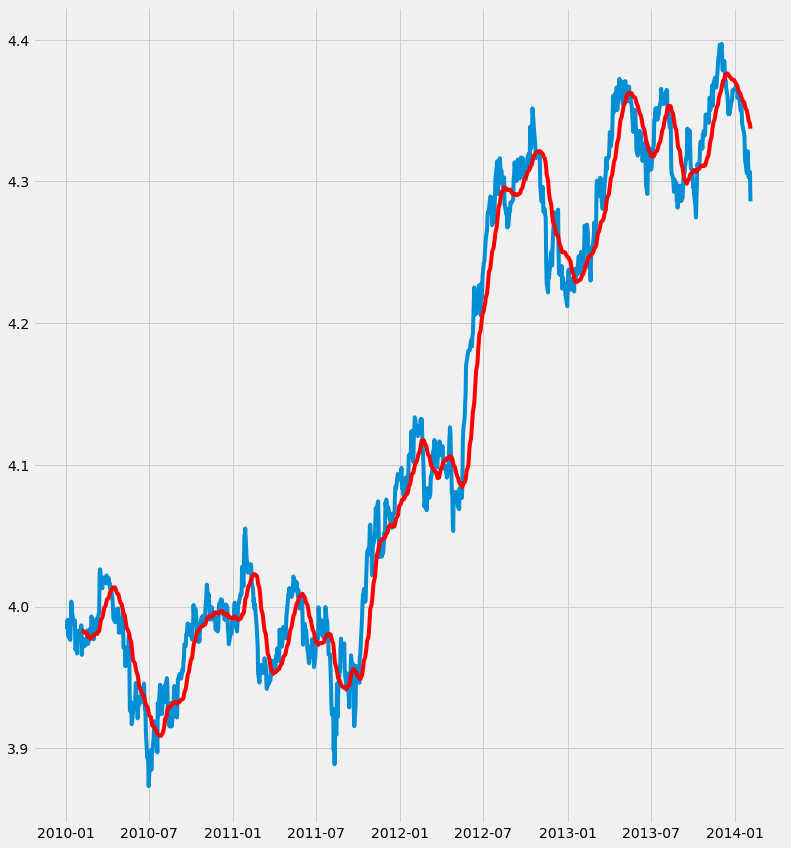

In [28]:
plt.figure(figsize=(12,14))

train_log = np.log(train) 
test_log = np.log(test)
moving_avg = train_log.rolling(24).mean() 
plt.plot(train_log) 
plt.plot(moving_avg, color = 'red') 
plt.show()



> We can observe that there is a trend, so it is not stationary. Now we will remove this trend to make our time series stationary.



In [0]:
train_log_moving_average_diff = train_log - moving_avg

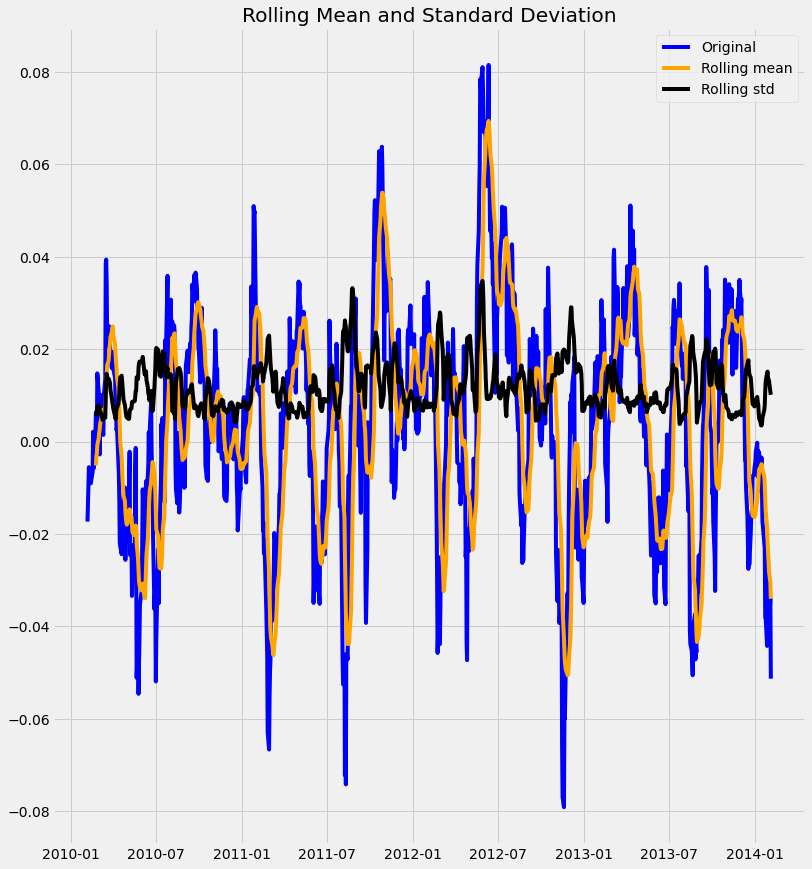

Results of Dickey-Fuller 
Test stat.                    -5.569085
p-value                        0.000001
Num. of lags used              0.000000
Num of observations used    1005.000000
critical value (1%)           -3.436873
critical value (5%)           -2.864420
critical value (10%)          -2.568304
dtype: float64


(None, None)

In [30]:
plt.figure(figsize=(12,14))

train_log_moving_average_diff.dropna(inplace = True), test_stationarity(train_log_moving_average_diff)



> Now, the Test Statistic is less than the Critical Value and the p-value is less than 5%. So, we can be confident that the trend is almost removed.



![alt text](https://)

> ***Now  we should stabilize the variance, b.c. it is also a requirement of stationary time series***




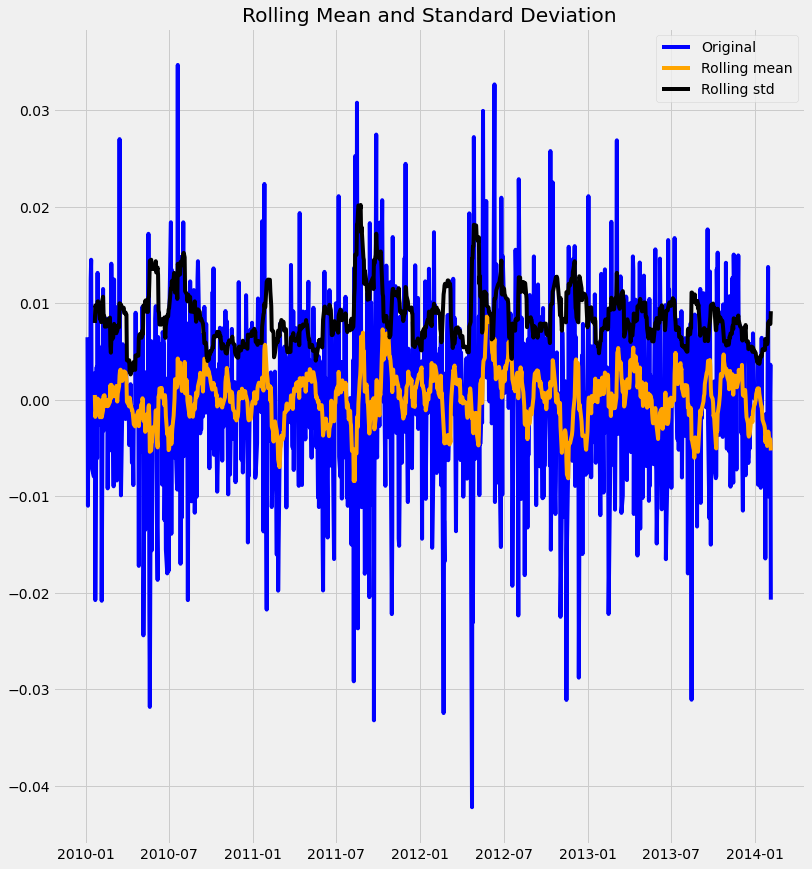

Results of Dickey-Fuller 
Test stat.                   -33.285123
p-value                        0.000000
Num. of lags used              0.000000
Num of observations used    1027.000000
critical value (1%)           -3.436733
critical value (5%)           -2.864358
critical value (10%)          -2.568271
dtype: float64


In [31]:
plt.figure(figsize=(12,14))

train_log_diff = train_log - train_log.shift(1) 
test_stationarity(train_log_diff.dropna())



> Now we will decompose the time series into trend and seasonality and will get the residual which is the random variation in the series.

We are removing the seasonal part 



Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(0,0,0,0) [intercept=True]; AIC=-6749.755, BIC=-6720.143, Time=0.790 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=-6756.006, BIC=-6746.135, Time=0.197 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=-6755.748, BIC=-6740.942, Time=0.081 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=-6755.693, BIC=-6740.887, Time=0.139 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=-6756.920, BIC=-6751.985, Time=0.073 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=-6753.899, BIC=-6734.157, Time=0.549 seconds
Total fit time: 1.839 seconds


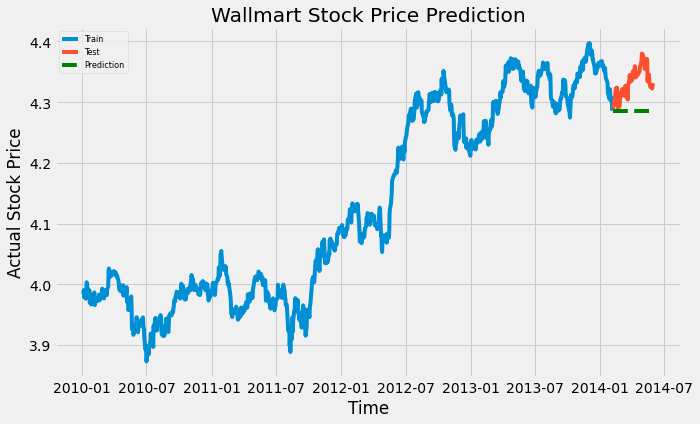

In [32]:
from pmdarima import auto_arima
model = auto_arima(train_log, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train_log)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test_log.index,columns=['Prediction'])
#plot the predictions for validation set
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(forecast,'g--', label='Prediction')
plt.title('Wallmart Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()



> We will use the RMSE(Root Mean Square Error) to judge our forecast results



In [33]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test_log,forecast))
print("RMSE: ", rms)

RMSE:  0.05306883461389069


In [34]:
# Calculate the absolute errors
errors = abs(np.ravel(forecast) - np.ravel(test_log))

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.05 degrees.


In [35]:
# Determine Performance Metrics
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (np.ravel(errors) / np.ravel(test_log))

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Prediction Accuracy is:', round(accuracy, 2), '%.')

Prediction Accuracy is: 98.91 %.


**Well, 1.1% of error is a VERY GOOD result in our case**

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import gmean

In [0]:
price_df = pd.read_csv('/content/drive/My Drive/prices.csv')
sec_df = pd.read_csv('/content/drive/My Drive/securities.csv')
fund_df = pd.read_csv('/content/drive/My Drive/fundamentals.csv')

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 <a list of 10 Text major ticklabel objects>)

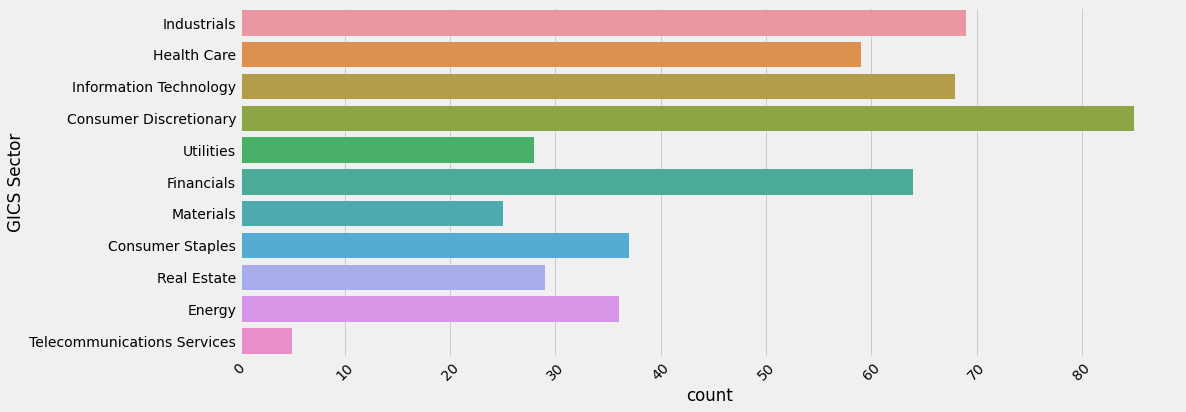

In [38]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(y='GICS Sector', data=sec_df)
plt.xticks(rotation=45)

In [39]:
sec_df = sec_df.rename(columns = {'Ticker symbol' : 'symbol','GICS Sector' : 'sector'})
sec_df.head()

,symbol,Security,SEC filings,sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In [40]:
price_df  = price_df.merge(sec_df[['symbol','sector']], on = 'symbol')
price_df['date'] = pd.to_datetime(price_df['date'])
price_df.head()

,date,symbol,open,close,low,high,volume,sector
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,Financials
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,Financials
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,Financials
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,Financials
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,Financials


In [0]:
price_df = price_df[price_df['date'] <= '2015-12-15']

In [42]:
sector_pivot = pd.pivot_table(price_df, values = 'open', index = ['date'],columns = ['sector']).reset_index()
sector_pivot

sector,date,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Telecommunications Services,Utilities
0,2010-01-04,38.637662,43.401177,52.936363,43.467241,51.284999,44.593337,60.657635,55.804348,44.124482,21.553974,35.109642
1,2010-01-05,38.556795,43.539706,53.801515,43.717759,51.507592,44.744765,60.717000,56.356087,43.652759,21.683973,35.031071
2,2010-01-06,38.859359,43.480588,54.264544,44.025000,51.300370,44.855400,60.635255,56.423478,43.750690,21.345975,34.658571
3,2010-01-07,38.955128,43.512647,54.657575,43.959656,51.440925,44.947781,59.971285,56.836086,43.556207,20.901974,34.788571
4,2010-01-08,39.050513,43.346470,54.432727,44.448104,51.745370,45.310479,59.185888,56.636522,43.667586,20.671976,34.625714
...,...,...,...,...,...,...,...,...,...,...,...,...
1494,2015-12-09,107.136905,77.904167,50.102222,66.315410,121.181187,81.892942,83.524411,78.948000,92.599657,32.658000,49.533571
1495,2015-12-10,106.829287,77.511111,49.833056,65.571639,120.735763,81.788824,82.673677,78.610000,92.445517,32.600000,49.660714
1496,2015-12-11,105.399286,76.735278,49.728055,64.755902,120.450678,81.260000,81.725147,77.292001,90.789655,32.310000,48.501786
1497,2015-12-14,104.736190,76.693889,47.856389,63.775574,119.016440,80.809117,81.222794,76.501600,91.180001,31.800000,48.639643


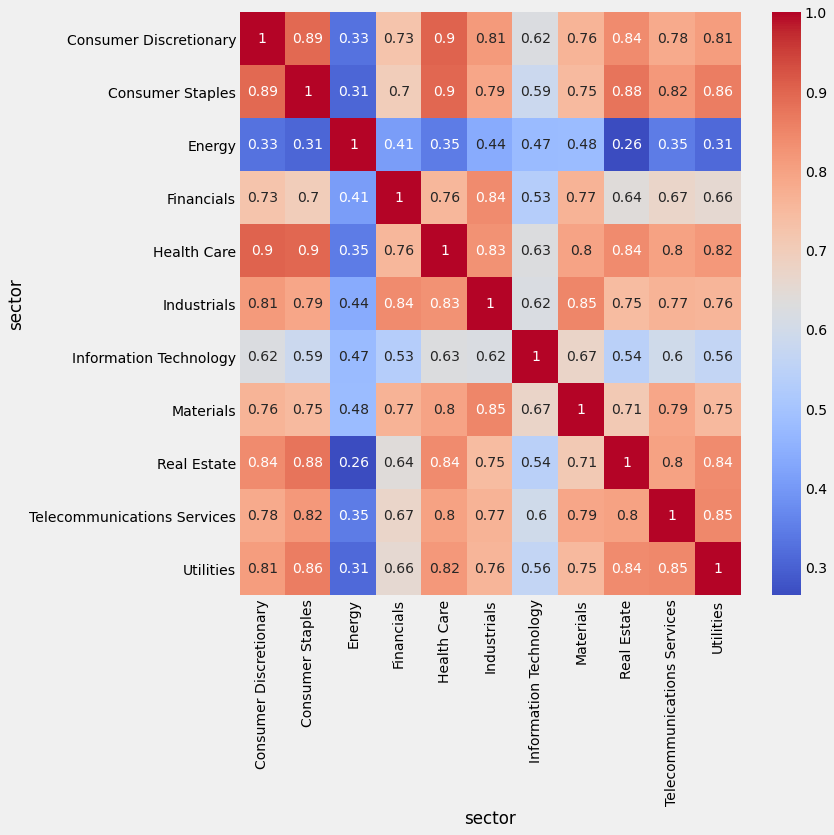

In [43]:
plt.figure(figsize = (10,10))
sns.heatmap(sector_pivot.corr('kendall'),annot=True, cmap="coolwarm")

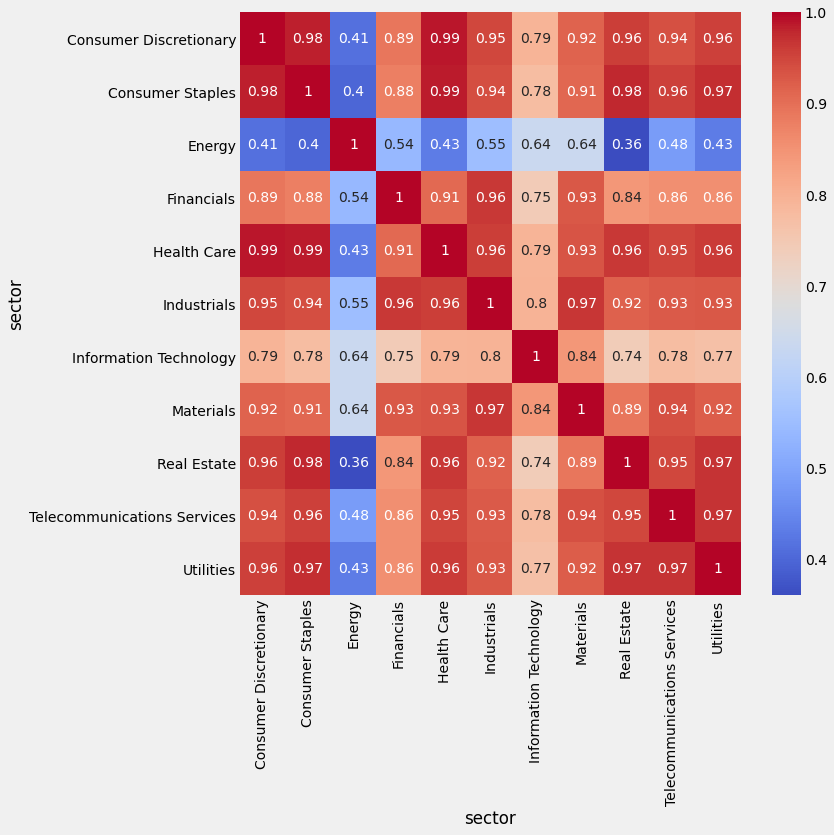

In [44]:
plt.figure(figsize = (10,10))
sns.heatmap(sector_pivot.corr('spearman'),annot=True, cmap="coolwarm")

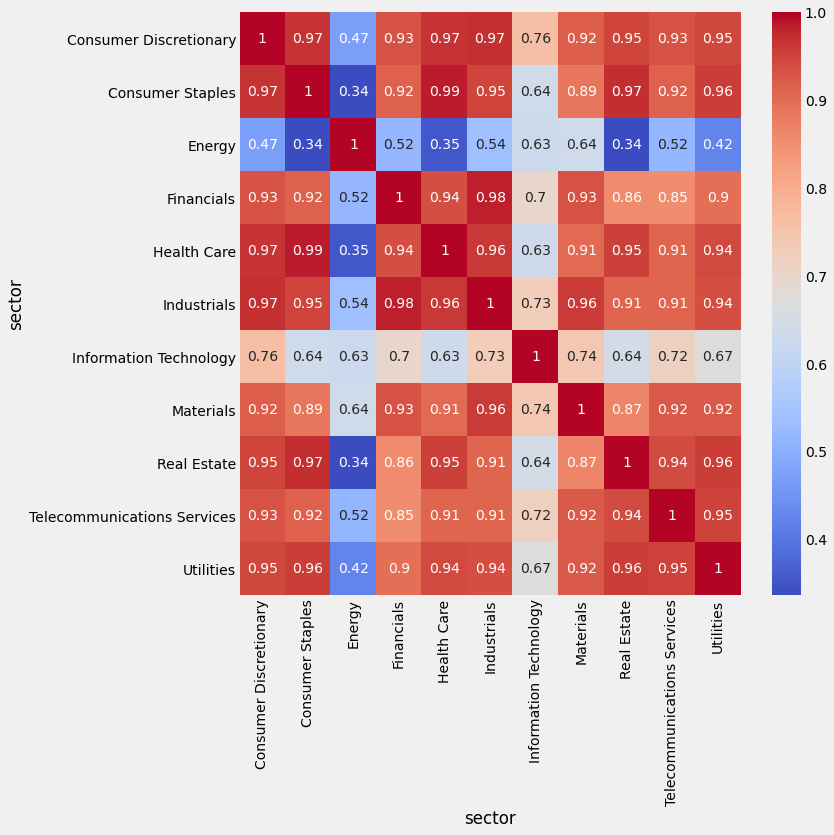

In [45]:
plt.figure(figsize = (10,10))
sns.heatmap(sector_pivot.corr('pearson'),annot=True, cmap="coolwarm")

In [0]:
#importing lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
import plotly.graph_objs as go
# init_notebook_mode()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

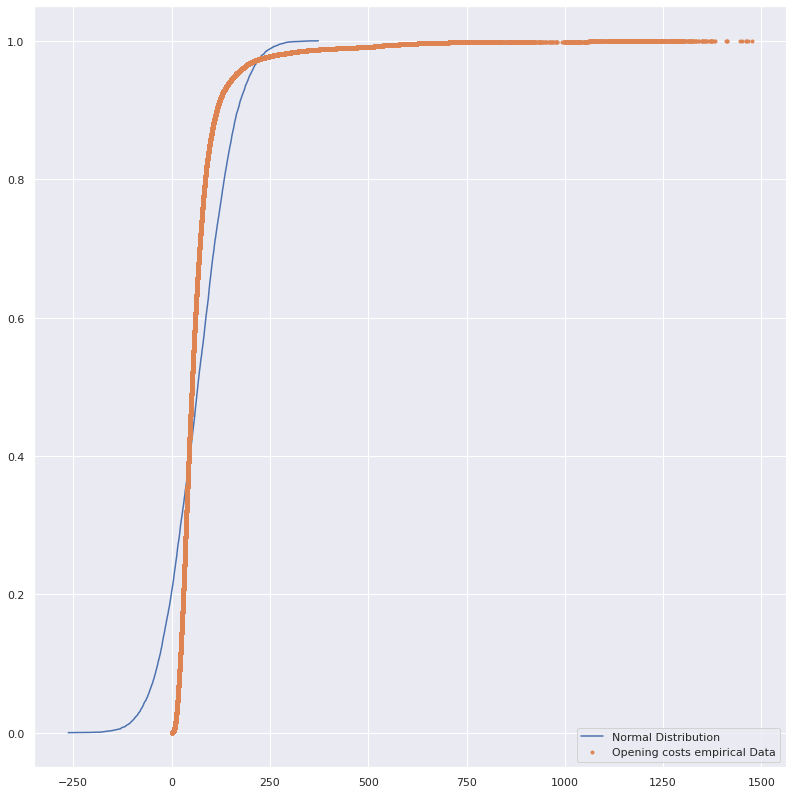

In [48]:
x, y = ecdf(price_df['open'])

samples = np.random.normal(np.mean(price_df['open']), np.std(price_df['open']), size=10000)
x_theor, y_theor = ecdf(samples)
sns.set()
plt.figure(figsize=(12,14))
plt.plot(x_theor, y_theor)

plt.plot(x, y, marker=".", linestyle="none")

plt.legend(('Normal Distribution', 'Opening costs empirical Data'), loc='lower right')

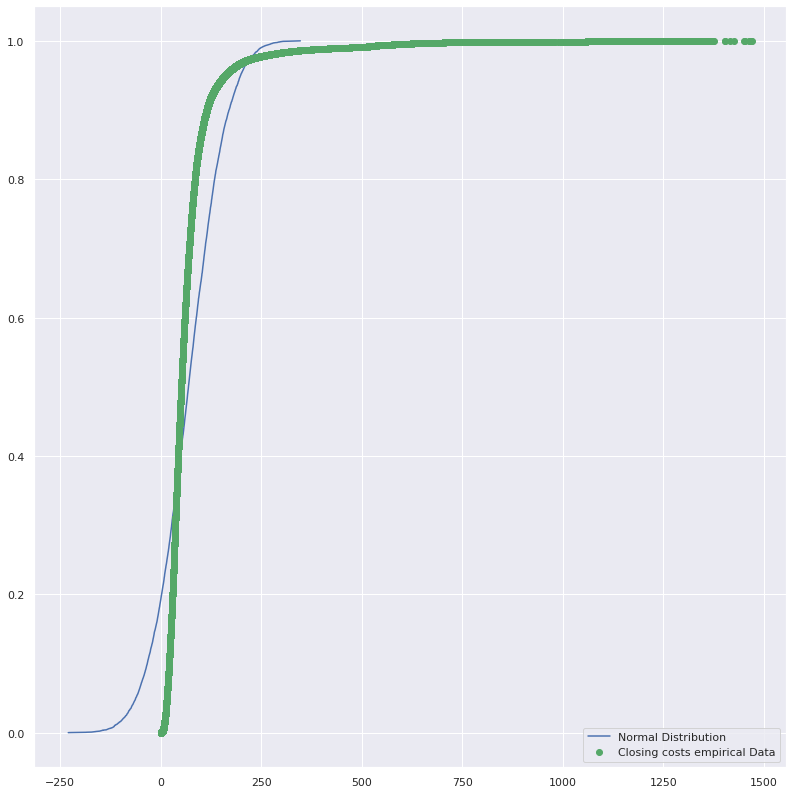

In [49]:
x, y = ecdf(price_df['close'])

samples = np.random.normal(np.mean(price_df['close']), np.std(price_df['close']), size=10000)
x_theor, y_theor = ecdf(samples)
sns.set()
plt.figure(figsize=(12,14))
plt.plot(x_theor, y_theor)

plt.plot(x, y,'go')

plt.legend(('Normal Distribution', 'Closing costs empirical Data'), loc='lower right')

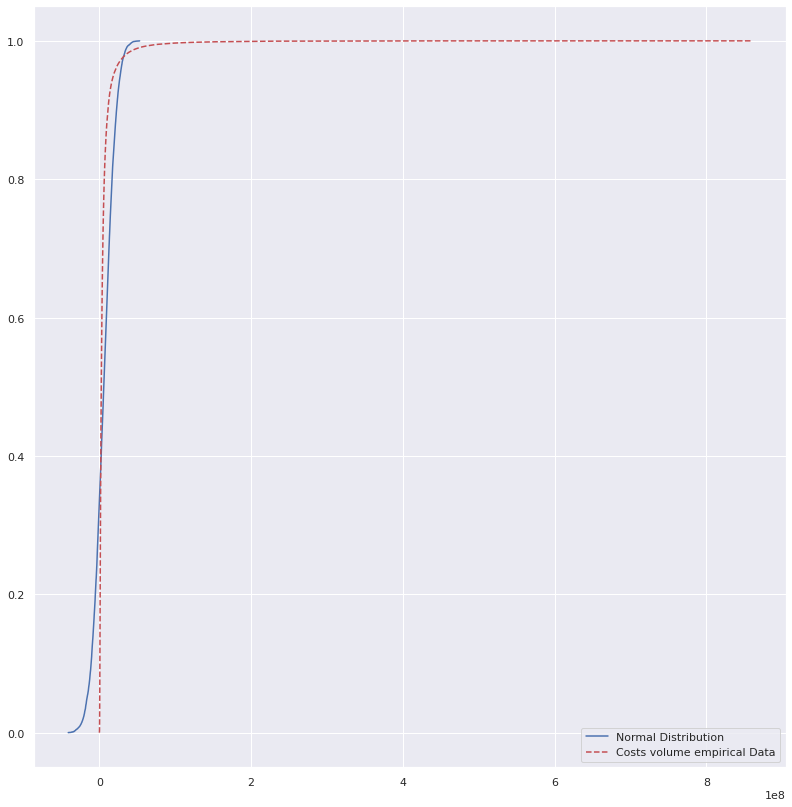

In [50]:
x, y = ecdf(price_df['volume'])

samples = np.random.normal(np.mean(price_df['volume']), np.std(price_df['volume']), size=10000)
x_theor, y_theor = ecdf(samples)
sns.set()
plt.figure(figsize=(12,14))
plt.plot(x_theor, y_theor)

plt.plot(x, y,'r--')

plt.legend(('Normal Distribution', 'Costs volume empirical Data'), loc='lower right')

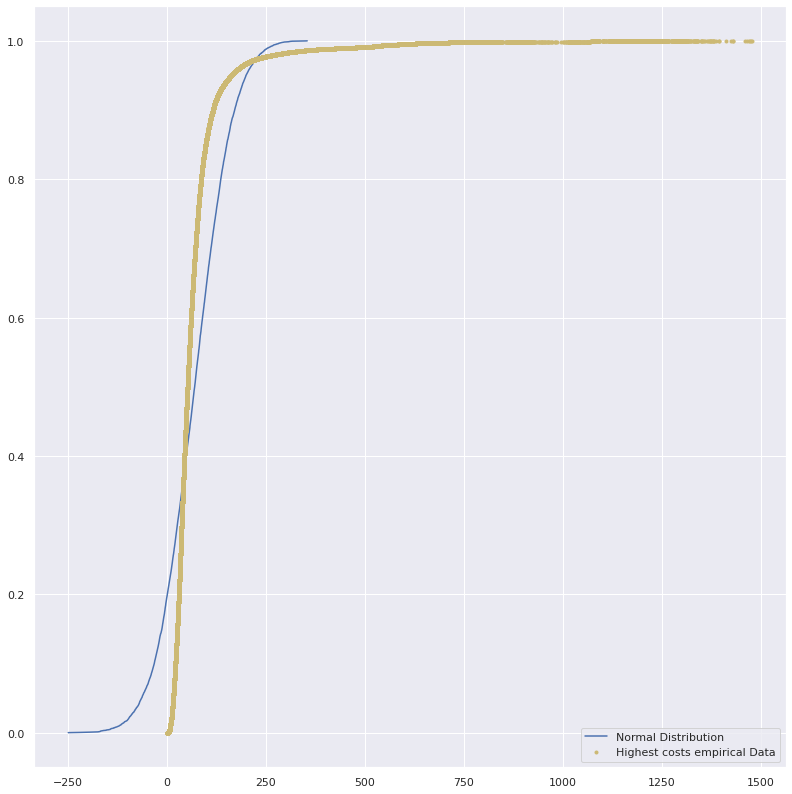

In [51]:
x, y = ecdf(price_df['high'])

samples = np.random.normal(np.mean(price_df['high']), np.std(price_df['high']), size=10000)
x_theor, y_theor = ecdf(samples)
sns.set()
plt.figure(figsize=(12,14))
plt.plot(x_theor, y_theor)

plt.plot(x, y,'y.')

plt.legend(('Normal Distribution', 'Highest costs empirical Data'), loc='lower right')

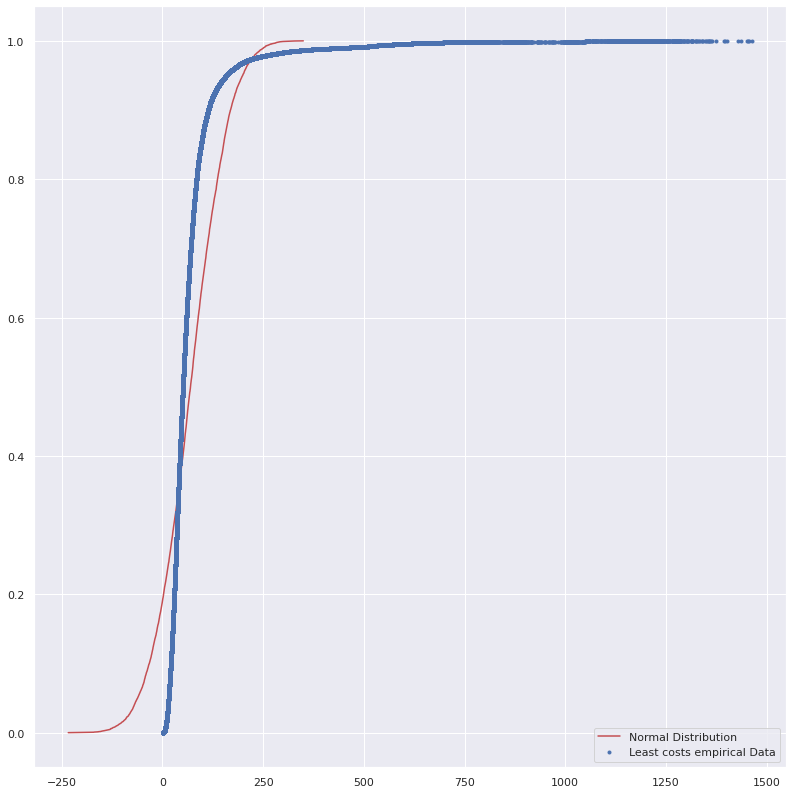

In [52]:
x, y = ecdf(price_df['low'])

samples = np.random.normal(np.mean(price_df['low']), np.std(price_df['low']), size=10000)
x_theor, y_theor = ecdf(samples)
sns.set()
plt.figure(figsize=(12,14))
plt.plot(x_theor, y_theor,'r-')

plt.plot(x, y,'b.')

plt.legend(('Normal Distribution', 'Least costs empirical Data'), loc='lower right')

In [0]:
from __future__ import print_function

import numpy as np
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from math import sqrt

Hence, we can see that all costs data features are distributed closely to the Normal Gaussian rule


In [0]:
stocks = fund_df

In [0]:
top_rev = stocks.groupby(by='Ticker Symbol').agg({'Total Revenue':sum})

In [0]:
g = top_rev['Total Revenue'].nlargest(5)

In [57]:
next = [Bar(
            y=g,
            x=g.keys(),
            marker = dict(
            color = 'lightsteelblue'
            ),
            name = "Contractor's amount earned per project"
    )]
layout1 = go.Layout(
    title="Top 10 Exporters",
    xaxis=dict(
        title='Company',
        titlefont=dict(
            size=30,
            color='#7f7f7f'
               )
    ),
    yaxis=dict(
        title='Total Revenue',
        titlefont=dict(
            size=22,
            color='#7f7f7f'
        )
    )
)
myFigure2 = go.Figure(data = next, layout = layout1)
iplot(myFigure2)

Here are the top 5 stocks that has the biggest revenue: 

    1. Walmart 
    2. EXXON MOBIL corp
    3. Apple inc.
    4. Chevron Corp.
    5. General Motoros

In [0]:
WMT = stocks[stocks['Ticker Symbol']=='WMT']
#sns.distplot(Aqua['Generation'],bins=28,kde=False,color='red')

In [0]:
gir = ['Total Equity',
       'Total Revenue',
       'Accounts Payable',
       'Accounts Receivable',
      'Cost of Revenue',
      'Profit Margin',
      'Sale and Purchase of Stock',
      'Earnings Per Share',
       'Net Borrowings']
tip = np.corrcoef(WMT[gir].values.T)

In [60]:
WMT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 1706 to 1709
Data columns (total 79 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           4 non-null      int64  
 1   Ticker Symbol                                        4 non-null      object 
 2   Period Ending                                        4 non-null      object 
 3   Accounts Payable                                     4 non-null      float64
 4   Accounts Receivable                                  4 non-null      float64
 5   Add'l income/expense items                           4 non-null      float64
 6   After Tax ROE                                        4 non-null      float64
 7   Capital Expenditures                                 4 non-null      float64
 8   Capital Surplus                                      4 non-null     

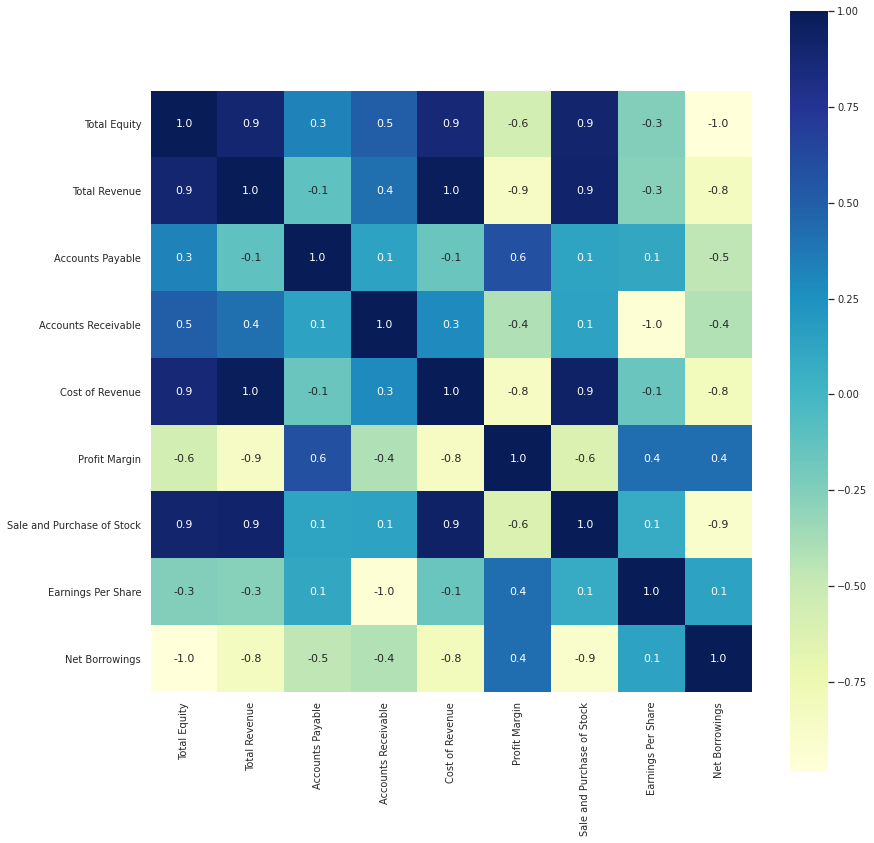

In [61]:
sns.set(font_scale = 0.9)
plt.figure(figsize=(12,14))

map = sns.heatmap(tip, cbar = True,
                  cmap="YlGnBu",
                  annot = True, 
                  square= True,
                  fmt = '.1f',
                  annot_kws = {'size':11}, 
                 yticklabels = gir,
                 xticklabels = gir)

#  **Linear Regression**

In [0]:

n = WMT['Total Revenue']
m = WMT[['Total Equity',
       'Accounts Payable',
       'Accounts Receivable',
      'Cost of Revenue',
      'Profit Margin',
      'Sale and Purchase of Stock',
      'Earnings Per Share',
       'Net Borrowings']]
target=['Total Revenue']
features = ['Total Equity',
       'Accounts Payable',
       'Accounts Receivable',
      'Cost of Revenue',
      'Profit Margin',
      'Sale and Purchase of Stock',
      'Earnings Per Share',
       'Net Borrowings']

In [0]:
# Splitting the into sets of training and test.
train,test,train_label,test_label=train_test_split(m,n,test_size=0.33,random_state=101)

In [64]:
lr = LinearRegression()
lr.fit(train, train_label)
# coef_ - is an array of features
print(np.ravel(lr.coef_))

[ 3.58945648e-01  1.20540825e-01  4.57569959e-02  2.43842126e-01
  0.00000000e+00  1.28905906e-01 -2.67682608e-11 -5.16376482e-01]


In [65]:
Linear = LinearRegression(fit_intercept=True)
mo = Linear.fit(train,train_label)
predi = mo.predict(test)
print(r2_score(test_label,predi))

0.6360693223051838


Correlation:  1.0


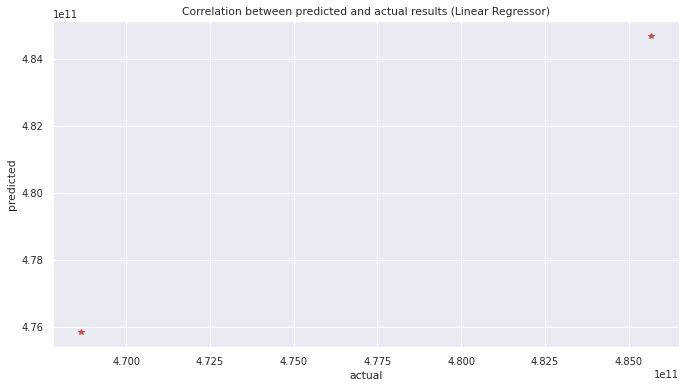

In [66]:
print('Correlation: ', round(np.corrcoef(np.ravel(test_label), np.ravel(predi))[0,1], 5))
fig = plt.figure(figsize=(10, 6))
plt.title('Correlation between predicted and actual results (Linear Regressor)')
plt.plot(test_label, predi, 'r*')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

In [67]:
# Finding the coefficient. (value of 1 unit increase) 
coef = pd.DataFrame(Linear.coef_,m.columns,columns=['Coefficient'])
coef

,Coefficient
Total Equity,3.589456e-01
Accounts Payable,1.205408e-01
Accounts Receivable,4.575700e-02
Cost of Revenue,2.438421e-01
Profit Margin,0.000000e+00
Sale and Purchase of Stock,1.289059e-01
Earnings Per Share,-2.676826e-11
Net Borrowings,-5.163765e-01


In [68]:
errors = abs(np.ravel(predi) - np.ravel(test_label))

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 4070710544.67 degrees.


In [69]:
# Determine Performance Metrics
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (np.ravel(errors) / np.ravel(test_label))

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.13 %.


# **Polynomial regression**

In [0]:
# Polynomial regression
# Fit on train set
model = PolynomialFeatures(degree=2)
X_train_ = model.fit_transform(test)
X_test_ = model.fit_transform(test)

plr = LinearRegression()
plr.fit(X_train_, train_label)
predicted_data = plr.predict(X_test_)


# predicted_data = np.round_(predicted_data)
# correct result; round of prediction, prediction


In [71]:
print('R^2: ', plr.score(X_test_, test_label))

R^2:  -0.8632310726643597


In [72]:
RMSE = sqrt(mean_squared_error(y_true=test_label, y_pred=predicted_data))
print('RMSE: ', RMSE)

RMSE:  11602518907.547619


In [73]:
print('squared errors: ', 
      round(sum(np.ravel(abs(test_label - np.around(predicted_data)))) / len(test_label), 3))

squared errors:  11418000000.0


In [74]:
errors = abs(np.ravel(predicted_data) - np.ravel(test_label))

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 11418000000.0 degrees.


In [75]:
mape = 100 * (np.ravel(errors) / np.ravel(test_label))

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Polynomial Regression Accuracy:', round(accuracy, 2), '%.')

Polynomial Regression Accuracy: 97.6 %.


# **Random Forest**

In [0]:
# Train Model
# Instantiate model 
rfg = RandomForestRegressor(n_estimators= 1000, random_state=42, criterion = 'mse', max_depth = None,
                            min_samples_split = 2, min_samples_leaf = 1)

# Train the model on training data
rfg.fit(train, np.ravel(train_label));

# Make Predictions on Test Data
# Use the forest's predict method on the test data
y_prediction = rfg.predict(test)



Correlation:  1.0


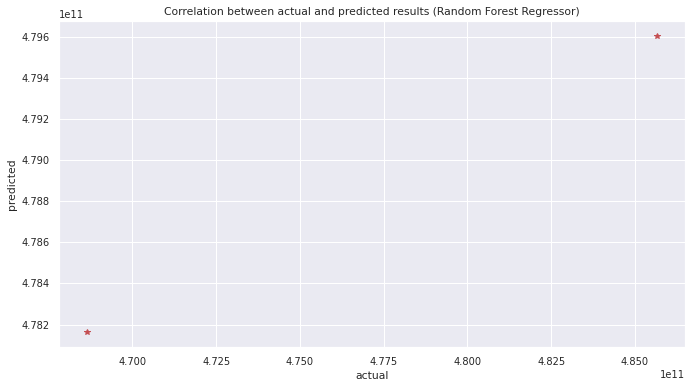

In [77]:
print('Correlation: ', round(np.corrcoef(np.ravel(test_label), np.ravel(y_prediction))[0,1], 5))
fig = plt.figure(figsize=(10, 6))
plt.title('Correlation between actual and predicted results (Random Forest Regressor)')
plt.plot(test_label, y_prediction, 'r*')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

In [78]:
print('R^2: ', rfg.score(test, test_label))

R^2:  0.12091246007928036


In [79]:
RMSE = sqrt(mean_squared_error(y_true=test_label, y_pred=y_prediction))
print('RMSE: ', RMSE)

RMSE:  7969571805.264822


In [80]:
print('squared errors: ', 
      round(sum(np.ravel(abs(np.ravel(test_label) - np.around(y_prediction)))) / len(test_label), 3))

squared errors:  7779254000.0


In [81]:
errors = abs(np.ravel(y_prediction) - np.ravel(test_label))

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Determine Performance Metrics
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (np.ravel(errors) / np.ravel(test_label))

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 7779254000.0 degrees.
Accuracy: 98.36 %.


In [82]:
tree = rfg.estimators_[50]
print('The depth of this tree is:', tree.tree_.max_depth)

The depth of this tree is: 1


In [83]:
# Variable Importances
# Get numerical feature importances
importances = list(rfg.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(m, round(importance, 2)) for m, importance in zip(m, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Accounts Receivable  Importance: 0.2
Variable: Accounts Payable     Importance: 0.16
Variable: Total Equity         Importance: 0.14
Variable: Sale and Purchase of Stock Importance: 0.13
Variable: Earnings Per Share   Importance: 0.13
Variable: Cost of Revenue      Importance: 0.12
Variable: Net Borrowings       Importance: 0.12
Variable: Profit Margin        Importance: 0.0


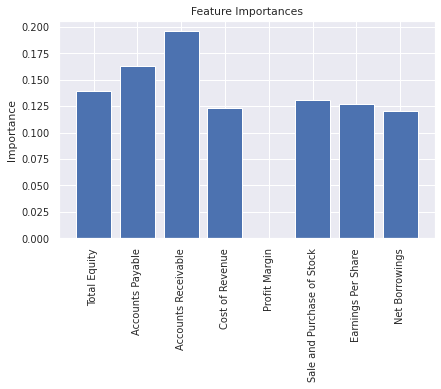

In [84]:
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, features, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.title('Feature Importances');

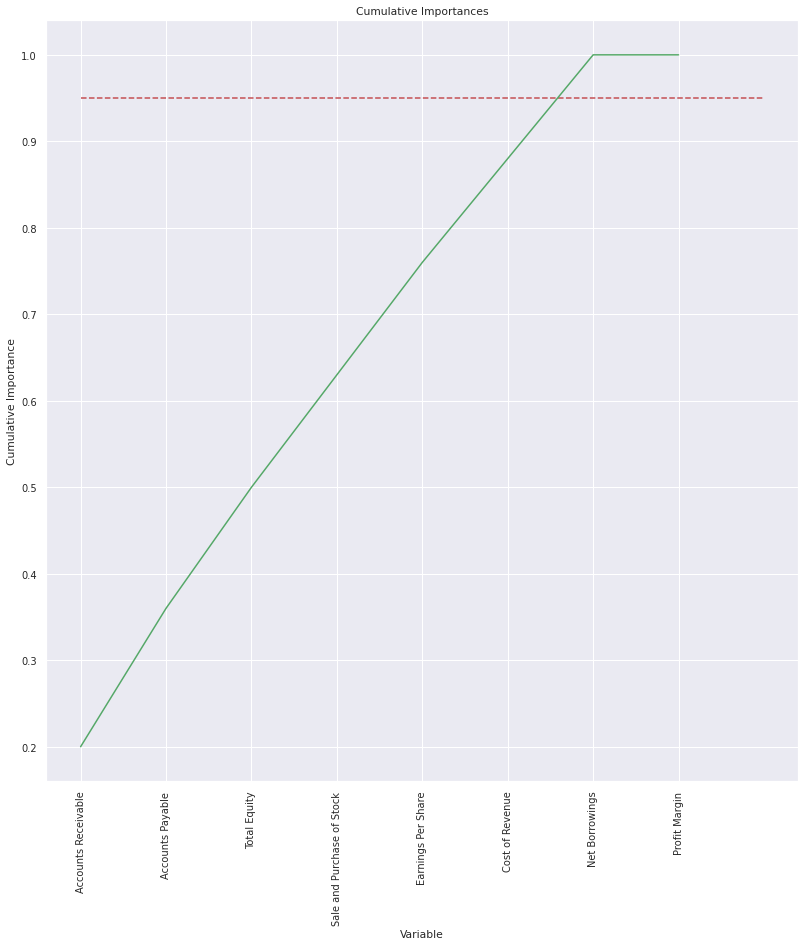

In [85]:
# A cumulative importance graph: shows the contribution to the overall importance 
# of each additional variable. 
# The dashed line - at 95% of total importance accounted for.
# After that some unimportant features (sulphates and may be density) can be removed.
# 95% - is an arbitrary threshold.
plt.figure(figsize=(12,14))
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [86]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
importantFeaturesCount = np.where(cumulative_importances > 0.95)[0][0] + 1
print('Count of features for 95% importance:', importantFeaturesCount)

# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:importantFeaturesCount]]
# Find the columns of the most important features
important_indices = [features.index(feature) for feature in important_feature_names]
# Create training and testing sets with only the important features
important_train_features = train.iloc[:, important_indices]
important_test_features = test.iloc[:, important_indices]
# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_feature_names)

Count of features for 95% importance: 7
Important train features shape: (2, 7)
Important test features shape: ['Accounts Receivable', 'Accounts Payable', 'Total Equity', 'Sale and Purchase of Stock', 'Earnings Per Share', 'Cost of Revenue', 'Net Borrowings']


In [87]:
important_feature_names

['Accounts Receivable',
 'Accounts Payable',
 'Total Equity',
 'Sale and Purchase of Stock',
 'Earnings Per Share',
 'Cost of Revenue',
 'Net Borrowings']

In [88]:
# As it can be seen from the results, they became worse than for the case with all the features
# Removing the so-called "unimportant" feature did not improve metrics

# Training and Evaluating on Important Features
# Train the expanded model on only the important features
rfg.fit(important_train_features, np.ravel(train_label));
# Make predictions on test data
predictions = rfg.predict(important_test_features)
# Performance metrics
print('R^2: ', rfg.score(important_test_features, test_label))
errors = abs(np.ravel(predictions) - np.ravel(test_label))
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (np.ravel(errors) / np.ravel(test_label))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

R^2:  0.12932681554159176
Average absolute error: 7735484000.0 degrees.
Accuracy: 98.37 %.


# **Testing Classification prediction on different training samples**

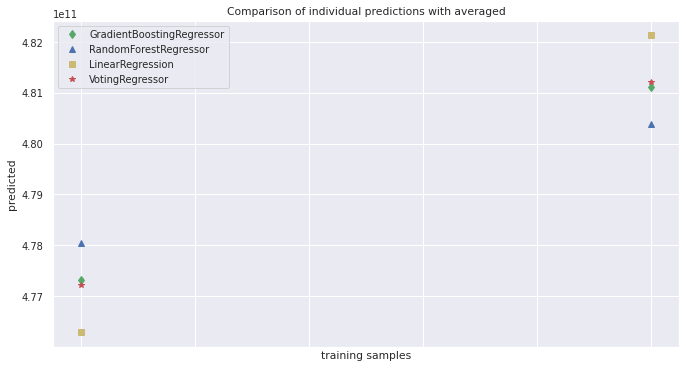

In [89]:
reg1 = GradientBoostingRegressor(random_state=1, n_estimators=10)
reg2 = RandomForestRegressor(random_state=1, n_estimators=10)
reg3 = LinearRegression()
ereg = VotingRegressor([('gb', reg1), ('rf', reg2), ('lr', reg3)])
reg1.fit(train, train_label.values.ravel())
reg2.fit(train, train_label.values.ravel())
reg3.fit(train, train_label.values.ravel())
ereg.fit(train, train_label.values.ravel())

# for some 20 values
xt = train[:20]

plt.figure(figsize=(10, 6))
plt.plot(reg1.predict(xt), 'gd', label='GradientBoostingRegressor')
plt.plot(reg2.predict(xt), 'b^', label='RandomForestRegressor')
plt.plot(reg3.predict(xt), 'ys', label='LinearRegression')
plt.plot(ereg.predict(xt), 'r*', label='VotingRegressor')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions with averaged')
plt.show()

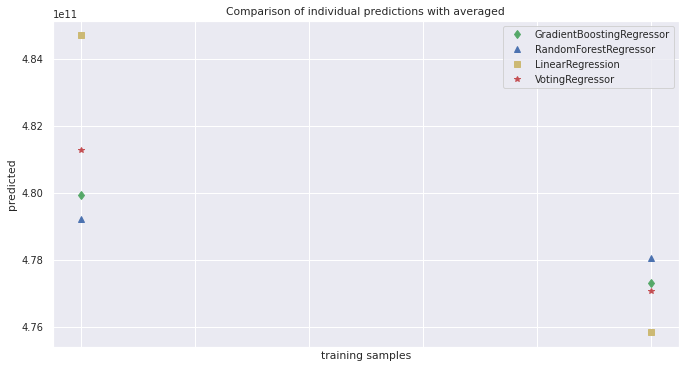

In [90]:
xt = test[:20]

plt.figure(figsize=(10, 6))
plt.plot(reg1.predict(xt), 'gd', label='GradientBoostingRegressor')
plt.plot(reg2.predict(xt), 'b^', label='RandomForestRegressor')
plt.plot(reg3.predict(xt), 'ys', label='LinearRegression')
plt.plot(ereg.predict(xt), 'r*', label='VotingRegressor')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions with averaged')
plt.show()

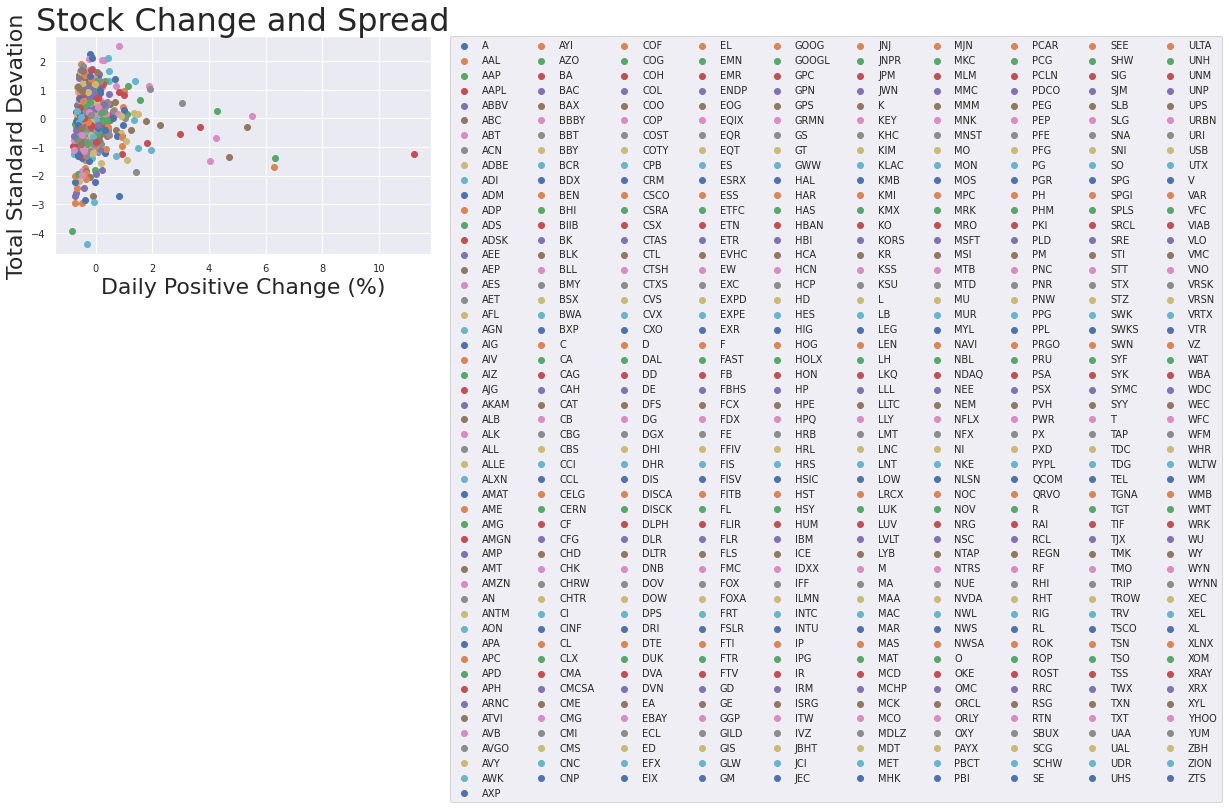

<Figure size 720x7200 with 0 Axes>

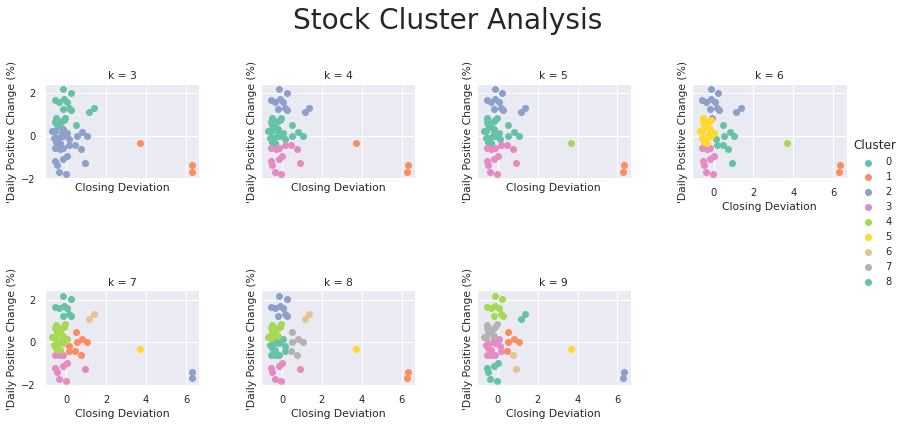

In [91]:
# KNN
mainFrame = pd.read_csv('/content/drive/My Drive/prices.csv')

mainFrame["change"] = mainFrame["close"] - mainFrame["open"]

df_interest = mainFrame[["symbol", "date", "open", "close", "change", "volume"]]

df_interest["date"] = pd.to_datetime(df_interest["date"])

df_interest.head()

symbols = df_interest["symbol"].unique().tolist()

full_count = len(symbols)



oppFrame = df_interest.pivot(index = 'date', columns = 'symbol', values = 'close')

oppFrame = oppFrame.dropna(axis=1)

opp_symbols = oppFrame.columns

part_count = len(oppFrame.columns) 

'''

for u in opp_symbols[:10]:

    plt.plot(oppFrame.index.tolist(), oppFrame[u].values.tolist())

plt.legend(symbols, loc='upper left')

plt.show()

'''




ss = df_interest.groupby(by=["symbol"])["change"].std()

ss = (ss-ss.mean())/ss.std()



pcs = df_interest.groupby(by='symbol').apply(lambda grp: grp[grp['change'] > 0]['change'].count() / grp['change'].size)

pcs = (pcs-pcs.mean())/pcs.std()



avgv = df_interest.groupby(by=['symbol'])['volume'].mean()/10000000

avgv = (avgv-avgv.mean())/avgv.std()



newdf = pd.concat([ss, pcs, avgv], axis=1).reset_index()

newdf.columns = ['symbol', 'std', 'prop_pos_day_change', "avg_volume"]

newdf.head()



for i in newdf['symbol'].tolist():

    x = newdf[newdf['symbol'] == i]['std']

    y = newdf[newdf['symbol'] == i]['prop_pos_day_change']

    plt.scatter(x,y)

plt.legend(newdf['symbol'].tolist(),

           bbox_to_anchor=(1.05, 1),

           loc=2,

           borderaxespad=0.,

          ncol=10)



plt.title(r'Stock Change and Spread', fontsize=32)

plt.xlabel('Daily Positive Change (%)', fontsize=22)

plt.ylabel('Total Standard Devation', fontsize=22)

plt.figure(figsize=(10,100))

plt.show()



df1 = newdf.iloc[0:10,:]

df2 = newdf.iloc[100:110,:]

df3 = newdf.iloc[200:210,:]

df4 = newdf.iloc[300:310,:]

df5 = newdf.iloc[400:410,:]

testdf = pd.concat([df1,df2,df3,df4,df5])

for i in range(0,50):

    testdf.index.values[i] = i



from sklearn.cluster import KMeans

kmdf = testdf

met={}

# Visualize K = {3..9}

kValues = [i for i in range(3,10)]

for k in kValues:

    kmeans = KMeans(n_clusters=k, random_state=0).fit(kmdf[['std','prop_pos_day_change']].to_numpy())

    kmdf[str(k)] = kmeans.labels_



kmdf = pd.melt(kmdf, 

                id_vars=["symbol", 'std', 'prop_pos_day_change'],

                var_name="k", 

                value_name="values",

                value_vars=list(kmdf.columns[-7:]))



kmdf.head()



g = sns.FacetGrid(kmdf, col="k", hue="values", col_wrap=4, palette='Set2')

g = g.map(plt.scatter, "std", "prop_pos_day_change")

g.set(xlabel="Closing Deviation")

g.set(ylabel="'Daily Positive Change (%)")

g.fig.suptitle("Stock Cluster Analysis", size=28)

g.fig.subplots_adjust(top=.8)

plt.subplots_adjust(hspace=1.2, wspace=0.4)

g.add_legend()

g._legend.set_title("Cluster")

#handles = g._legend_data.values()

#labels = g._legend_data.keys()

#g.fig.legend(handles=handles, labels=labels, loc='lower right', ncol=3)

met={}
from sklearn import metrics

for i in range(4,10):

    met[str(i)] = metrics.silhouette_score(kmdf.loc[kmdf['k']==str(i)][['std','prop_pos_day_change']], kmdf.loc[kmdf['k']==str(i)]['values'], metric='euclidean')



metdf = pd.Series(met)

# **Factor Analysis with PCA**

In [92]:
stocks.isnull().any()
newdata = pd.DataFrame(stocks[gir]) 
newdata

,Total Equity,Total Revenue,Accounts Payable,Accounts Receivable,Cost of Revenue,Profit Margin,Sale and Purchase of Stock,Earnings Per Share,Net Borrowings
0,-7.987000e+09,2.485500e+10,3.068000e+09,-222000000.0,1.049900e+10,8.0,0.000000e+00,-5.60,-1.020000e+09
1,-2.731000e+09,2.674300e+10,4.975000e+09,-93000000.0,1.101900e+10,7.0,0.000000e+00,-11.25,2.208000e+09
2,2.021000e+09,4.265000e+10,4.668000e+09,-160000000.0,1.562000e+10,7.0,-1.052000e+09,4.02,1.700000e+08
3,5.635000e+09,4.099000e+10,5.102000e+09,352000000.0,1.109600e+10,19.0,-3.846000e+09,11.39,2.856000e+09
4,1.210694e+09,6.205003e+09,2.409453e+09,-89482000.0,3.106967e+09,6.0,-1.860000e+07,5.29,1.774450e+08
...,...,...,...,...,...,...,...,...,...
1776,7.507519e+09,2.210591e+09,0.000000e+00,0.0,4.934400e+07,14.0,-1.532770e+08,1.20,-1.875180e+08
1777,9.400000e+08,4.561000e+09,1.381000e+09,-99000000.0,1.669000e+09,11.0,0.000000e+00,1.01,2.641000e+09
1778,1.311000e+09,4.785000e+09,1.071000e+09,69000000.0,1.717000e+09,12.0,2.000000e+06,1.16,-8.000000e+06
1779,1.068000e+09,4.765000e+09,1.313000e+09,-58000000.0,1.738000e+09,7.0,-1.920000e+08,0.68,1.115000e+09


In [93]:
X = newdata.interpolate()
X.shape

(1781, 9)

In [94]:
X = X.dropna()
X.shape

(1781, 9)

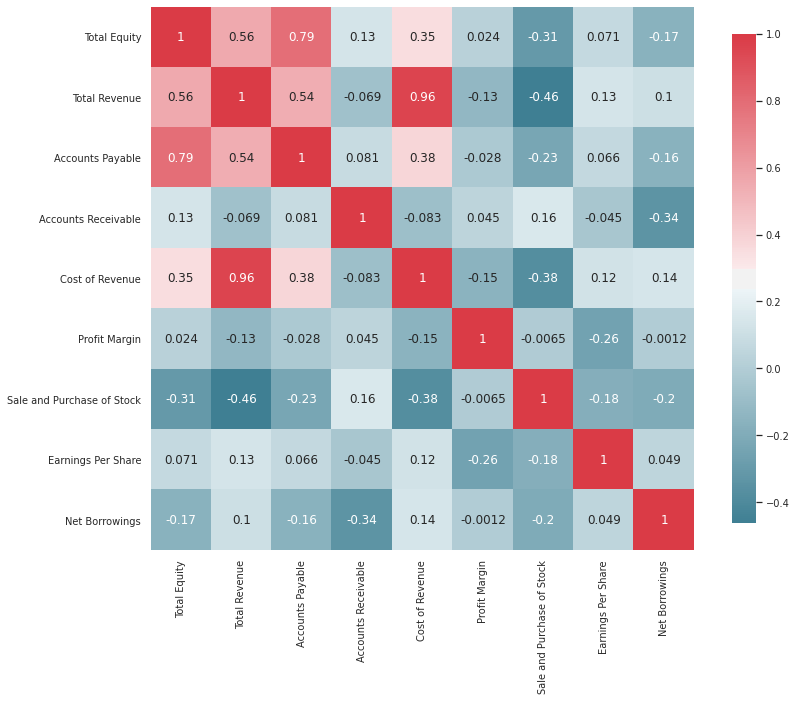

In [96]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

x_before_pca = pd.DataFrame(X)
x_before_pca.describe()
x_before_pca.shape
plot_correlation_map(x_before_pca)
from sklearn.decomposition import PCA as PCA
pca = PCA(n_components=9)
pca.fit(x_before_pca)
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1
plt.plot(var1)
x_pca = PCA(n_components=3)
x_pca.fit(x_before_pca)
x = x_pca.fit_transform(x_before_pca)
d = {'pc1': x[:,0], 'pc2': x[:, 1], 'pc3': x[:,2]}
x_df = pd.DataFrame(d)
x_df.head(3)
x_df.describe()
x_new_ndarray = x_pca.inverse_transform(x_df)
x_new = pd.DataFrame(x_new_ndarray)
x_new.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']
x_new.head(3)
x_before_pca.head(3)
plt.scatter(x_df['pc1'], x_df['pc2'], color = 'green')


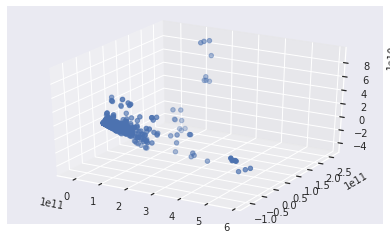

In [97]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs = x_df['pc1'], ys = x_df['pc2'], zs= x_df['pc3'], zdir='z')

In [98]:
x_df.describe()


,pc1,pc2,pc3
count,1.781000e+03,1.781000e+03,1.781000e+03
mean,2.058352e-06,-1.368932e-06,-1.721540e-07
std,5.305993e+10,2.403602e+10,7.810507e+09
min,-2.661834e+10,-1.195558e+11,-4.449361e+10
25%,-2.161694e+10,-4.636042e+09,-1.211107e+09
50%,-1.594462e+10,-2.723876e+09,3.917353e+08
75%,-3.200404e+09,9.649803e+08,1.202353e+09
max,5.781148e+11,2.612236e+11,9.220418e+10


In [99]:
x_df

,pc1,pc2,pc3
0,-3.762714e+09,-1.693863e+10,6.293875e+09
1,-1.232251e+08,-1.250825e+10,5.608224e+09
2,1.597879e+10,-1.232733e+10,2.882669e+09
3,1.349174e+10,-7.344102e+09,1.454381e+09
4,-1.942226e+10,-4.335590e+09,2.678767e+09
...,...,...,...
1776,-2.263431e+10,1.764036e+09,-1.880492e+09
1777,-2.169028e+10,-4.327412e+09,1.694939e+09
1778,-2.145001e+10,-4.005303e+09,1.465721e+09
1779,-2.147567e+10,-4.198325e+09,1.686484e+09


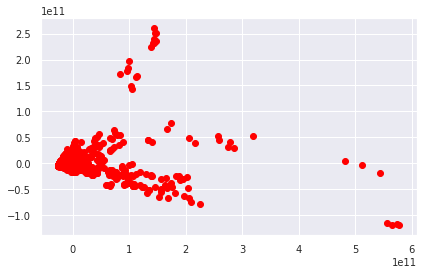

In [100]:
plt.scatter(x_df['pc1'], x_df['pc2'], color = 'red')


# **ANOVA**(**AN**alysis **O**f **VA**riance)

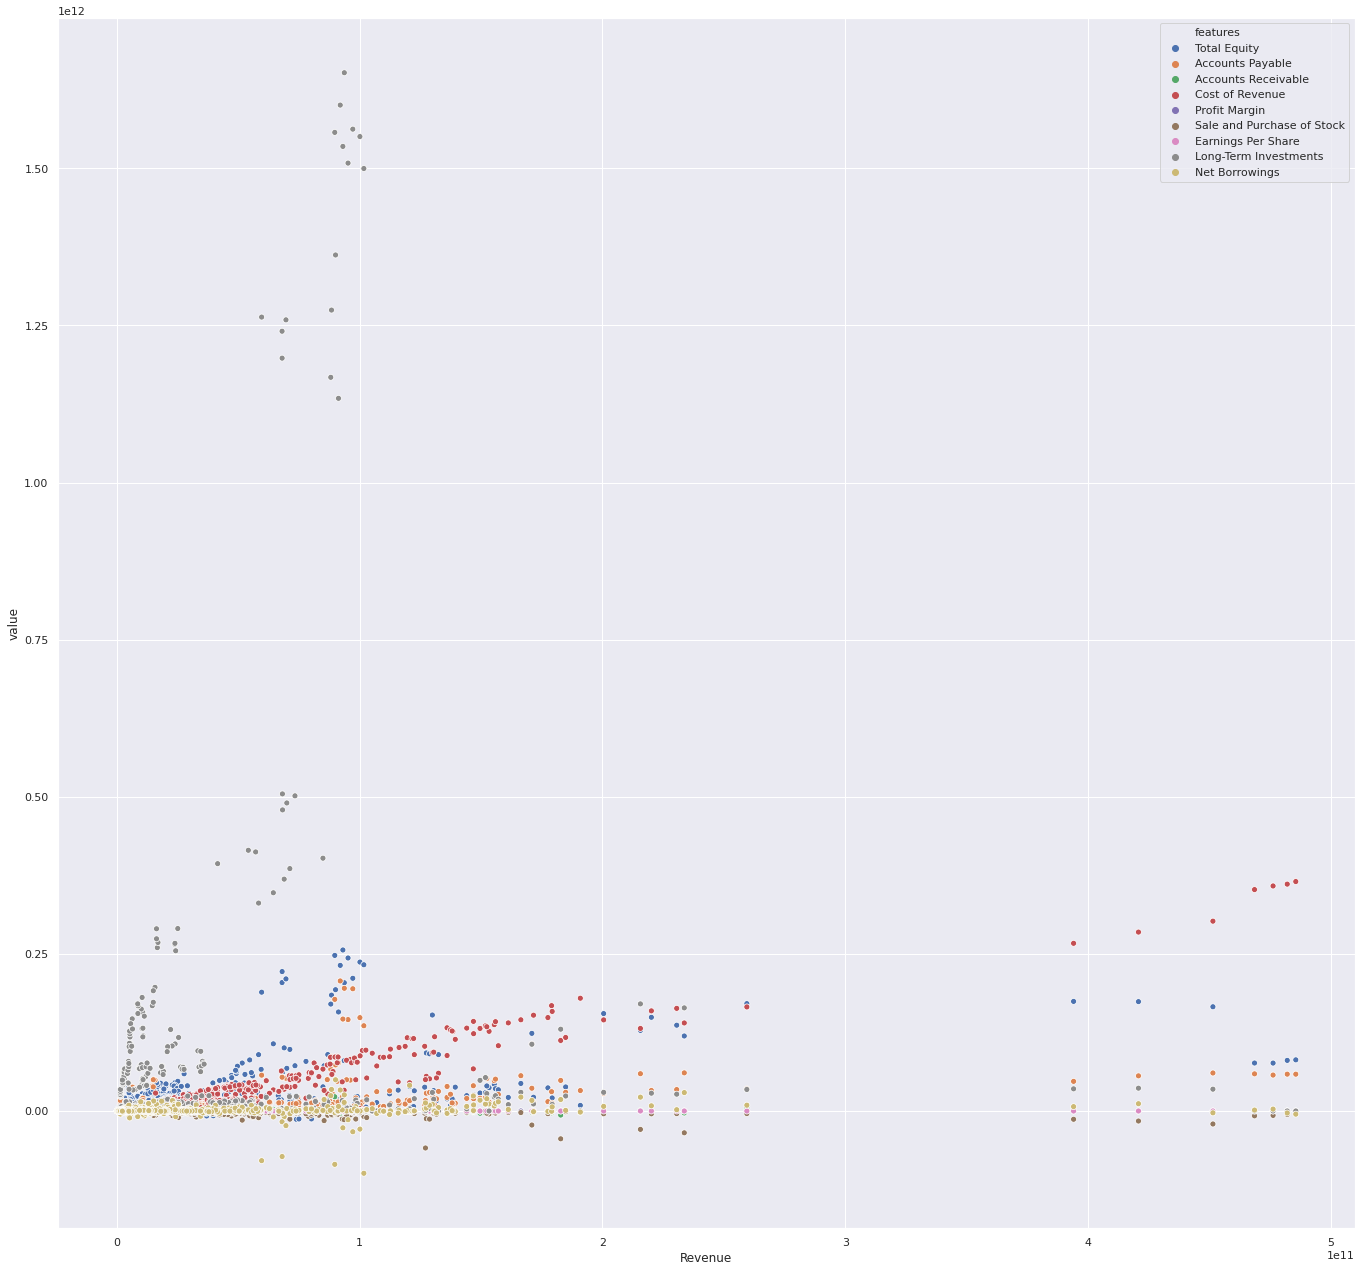

In [101]:
# load packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# load data file
d = stocks
# d['Date Local']=pd.to_datetime(d['Date Local'])
# reshape the d dataframe suitable for statsmodels package 
# you do not need to reshape if your data is already in stacked format. Compare d and d_melt tables for detail 
# understanding 
d_melt = pd.melt(d, id_vars=['Total Revenue'], value_vars=['Total Equity',
       'Accounts Payable',
       'Accounts Receivable',
      'Cost of Revenue',
      'Profit Margin',
      'Sale and Purchase of Stock',
      'Earnings Per Share',
       'Long-Term Investments',
       'Net Borrowings'])
# replace column names

d_melt.columns = ['Revenue', 'features', 'value']
# generate a boxplot to see the data distribution by genotypes and years. Using boxplot, we can easily detect the 
# differences between different groups
sns.set(rc={'figure.figsize':(20.7,22.27)})
sns.scatterplot(x="Revenue", y="value", hue="features", data=d_melt)

In [0]:
import scipy.stats as stats
from statsmodels.formula.api import ols
results = ols('value ~ C(Revenue) + C(features)',data=d_melt).fit()

In [103]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     1.790
Date:                Thu, 14 May 2020   Prob (F-statistic):           1.72e-69
Time:                        19:26:34   Log-Likelihood:            -4.1016e+05
No. Observations:               15810   AIC:                         8.238e+05
Df Residuals:                   14045   BIC:                         8.374e+05
Df Model:                        1764                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                 -1.802e+09   1.68e+10     -0.107      0.915   -3.48e+10    3.12e+10
C(Revenue)[T.1577000.0]                   -1.162e+06   2.37e+10   -4.9e-05      1.000   -4.65e+10    4.65e+10
C(Revenue)[T.79562000.0]                   1.899e+07   2.37e+10      0.001      0.999   -4.65e+10    4.65e+10
C(Revenue)[T.99642000.0]                   1.464e+07   2.37e+10      0.001      1.000   -4.65e+10    4.65e+10
C(Revenue)[T.409396000.0]                  1.008e+09   2.31e+10      0.044      0.965   -4.42e+10    4.62e+10
C(Revenue)[T.475888000.0]                  8.892e+08   2.31e+10      0.039      0.969   -4.43e+10    4.61e+10
C(Revenue)[T.484581000.0]                  1.131e+09   2.31e+10      0.049      0.961   -4.41e+10    4.63e+10
C(Revenue)[T.520613000.0]                  1.025e+09   2.31e+10      0.044      0.965   -4.42e+10    4.62e+10
C(Revenue)[T.535153000.0]                  1.062e+09   2.31e+10      0.046      0.963   -4.41e+10    4.63e+10
C(Revenue)[T.580415000.0]                  9.618e+08   2.31e+10      0.042      0.967   -4.42e+10    4.62e+10
C(Revenue)[T.610590000.0]                  1.112e+09   2.31e+10      0.048      0.962   -4.41e+10    4.63e+10
C(Revenue)[T.635490000.0]                   1.12e+09   2.31e+10      0.049      0.961   -4.41e+10    4.63e+10
C(Revenue)[T.637413000.0]                  9.823e+08   2.31e+10      0.043      0.966   -4.42e+10    4.62e+10
C(Revenue)[T.647155000.0]                  1.027e+09   2.31e+10      0.045      0.964   -4.42e+10    4.62e+10
C(Revenue)[T.686090000.0]                  9.971e+08   2.31e+10      0.043      0.966   -4.42e+10    4.62e+10
C(Revenue)[T.716612000.0]                  1.193e+09   2.31e+10      0.052      0.959    -4.4e+10    4.64e+10
C(Revenue)[T.744012000.0]                  1.005e+09   2.31e+10      0.044      0.965   -4.42e+10    4.62e+10
C(Revenue)[T.758926000.0]                  1.172e+09   2.31e+10      0.051      0.959    -4.4e+10    4.64e+10
C(Revenue)[T.763000000.0]                   8.64e+08   2.31e+10      0.037      0.970   -4.43e+10    4.61e+10
C(Revenue)[T.780209000.0]                  1.504e+09   2.31e+10      0.065      0.948   -4.37e+10    4.67e+10
C(Revenue)[T.782270000.0]                  1.207e+09   2.31e+10      0.052      0.958    -4.4e+10    4.64e+10
C(Revenue)[T.793373000.0]                   1.48e+09   2.31e+10      0.064      0.949   -4.37e+10    4.67e+10
C(Revenue)[T.797517000.0]                  1.432e+09   2.31e+10      0.062      0.950   -4.38e+10    4.66e+10
C(Revenue)[T.801591000.0]                  3.701e+08   2.37e+10      0.016      0.988   -4.61e+10    4.69e+10
C(Revenue)[T.818046000.0]                  1.198e+09   2.31e+10      0.052      0.959    -4.4e+10    4.64e+10
C(R

In [104]:
import statsmodels.api as sm

anova_table = sm.stats.anova_lm(results, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Revenue),6.129889e+24,1756.0,1.549627,1.071182e-38
C(features),9.883056e+23,8.0,54.840366,2.522082e-88
Residual,3.163899e+25,14045.0,NaN,NaN


In [0]:
from sklearn.preprocessing import StandardScaler, LabelEncoder


# **Classification**


In [0]:
sc = StandardScaler()
X_train = sc.fit_transform(train)
X_test = sc.fit_transform(test)

In [107]:

###
# Random Forest Classifier
# A random forest is a meta estimator that fits a number of decision tree classifiers on various
# sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
# The sub-sample size is always the same as the original input sample size
# but the samples are drawn with replacement if bootstrap=True (default).
# n_estimators - The number of trees on the forest

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(train, np.ravel(train_label))
pred_rfc = rfc.predict(test)
# print some values (correct and predicted ones)
print('correct:  ', np.ravel(test_label.values[0:15]))
print('predicted:', pred_rfc[0:15])

correct:   [4.85651e+11 4.68651e+11]
predicted: [4.82130e+11 4.76294e+11]


In [108]:
for i in range(0,11):
    print('     ' + str(i), end='')
print('\n')
pred_prob = rfc.predict_proba(X_test)[0:15]
# print correct result and predicted probabilities for each value


     0     1     2     3     4     5     6     7     8     9     10



Correlation:  1.0


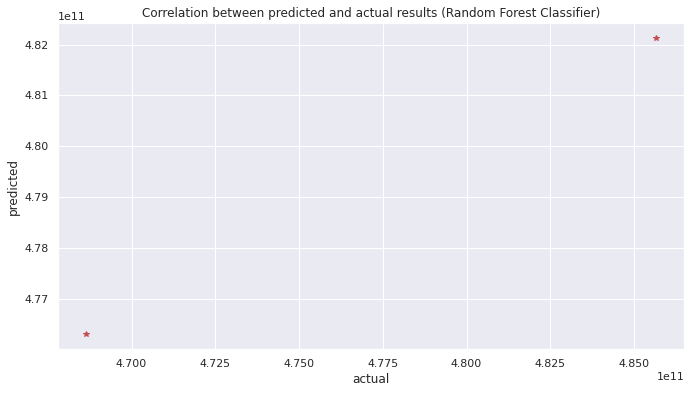

In [109]:
print('Correlation: ', round(np.corrcoef(np.ravel(test_label), np.ravel(pred_rfc))[0,1], 5))
fig = plt.figure(figsize=(10, 6))
plt.title('Correlation between predicted and actual results (Random Forest Classifier)')
plt.plot(test_label, pred_rfc, 'r*')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

In [110]:
# Determine Performance Metrics
# Calculate mean absolute percentage error (MAPE)


Error = np.mean(np.abs(np.subtract(test_label,pred_rfc)))
Average = np.mean(test_label)
MAPE = (Error/Average)*100

print('MAPE=',MAPE,'%.')
print('Accuracy=',100-MAPE,'%.')

MAPE= 1.169860274839621 %.
Accuracy= 98.83013972516038 %.


In [111]:
###
# Stochastic Gradient Descent Classifier
# The advantages of SGD:
# - Efficiency.
# - Ease of implementation (lots of opportunities for code tuning).
# The disadvantages of SGD:
# - SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.
# - SGD is sensitive to feature scaling.

sgd = SGDClassifier(penalty="elasticnet", max_iter=2000, tol=0.00001, loss="modified_huber")
sgd.fit(X_train, np.ravel(train_label))
pred_sgd = sgd.predict(test)
# print(sgd.coef_)
# print some values (correct and predicted ones)
print('correct:  ', np.ravel(test_label.values[0:15]))
print('predicted:', np.ravel(pred_sgd[0:15]))

correct:   [4.85651e+11 4.68651e+11]
predicted: [4.8213e+11 4.8213e+11]


Correlation:  nan


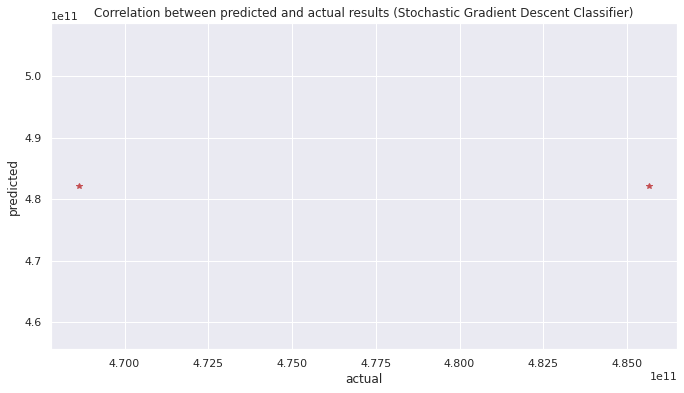

In [112]:
print('Correlation: ', round(np.corrcoef(np.ravel(test_label), np.ravel(pred_sgd))[0,1], 5))
fig = plt.figure(figsize=(10, 6))
plt.title('Correlation between predicted and actual results (Stochastic Gradient Descent Classifier)')
plt.plot(test_label, pred_sgd, 'r*')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

In [113]:

print(classification_report(test_label, pred_sgd))

print(confusion_matrix(test_label, pred_sgd))

                precision    recall  f1-score   support

468651000000.0       0.00      0.00      0.00       1.0
482130000000.0       0.00      0.00      0.00       0.0
485651000000.0       0.00      0.00      0.00       1.0

      accuracy                           0.00       2.0
     macro avg       0.00      0.00      0.00       2.0
  weighted avg       0.00      0.00      0.00       2.0

[[0 1 0]
 [0 0 0]
 [0 1 0]]


In [114]:
# Determine Performance Metrics
# Calculate mean absolute percentage error (MAPE)


Error = np.mean(np.abs(np.subtract(test_label,pred_sgd)))
Average = np.mean(test_label)
MAPE = (Error/Average)*100

print('MAPE=',MAPE,'%.')
print('Accuracy=',100-MAPE,'%.')

MAPE= 1.781406724496019 %.
Accuracy= 98.21859327550398 %.


In [115]:
###
# Support Vector Classifier
# fit time complexity is more than quadratic with the number of samples -> hard to scale more than 10000 samples.
# probability=True - to use predict_proba method

svc = SVC(probability=True)
svc.fit(train, np.ravel(train_label))
pred_svc = svc.predict(test)
# print some values (correct and predicted ones)
print('correct:  ', np.ravel(test_label.values[0:15]))
print('predicted:', pred_svc[0:15])

correct:   [4.85651e+11 4.68651e+11]
predicted: [4.82130e+11 4.76294e+11]


Correlation:  1.0


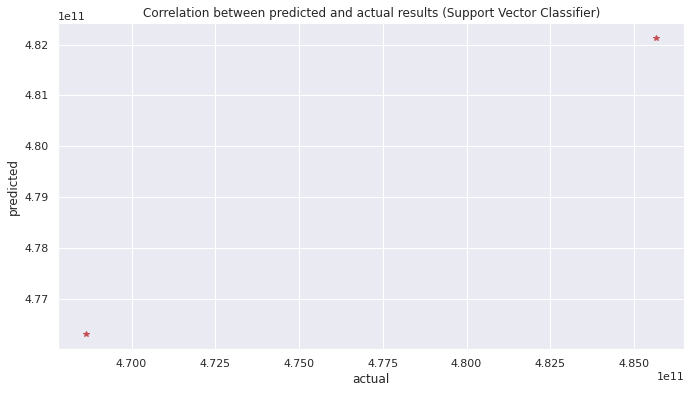

In [116]:
print('Correlation: ', round(np.corrcoef(np.ravel(test_label), np.ravel(pred_svc))[0,1], 5))
fig = plt.figure(figsize=(10, 6))
plt.title('Correlation between predicted and actual results (Support Vector Classifier)')
plt.plot(test_label, pred_svc, 'r*')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

In [117]:

print(classification_report(test_label, pred_svc))

print(confusion_matrix(test_label, pred_svc))
# Determine Performance Metrics
# Calculate mean absolute percentage error (MAPE)


Error = np.mean(np.abs(np.subtract(test_label,pred_svc)))
Average = np.mean(test_label)
MAPE = (Error/Average)*100

print('MAPE=',MAPE,'%.')
print('Accuracy=',100-MAPE,'%.')


                precision    recall  f1-score   support

468651000000.0       0.00      0.00      0.00       1.0
476294000000.0       0.00      0.00      0.00       0.0
482130000000.0       0.00      0.00      0.00       0.0
485651000000.0       0.00      0.00      0.00       1.0

      accuracy                           0.00       2.0
     macro avg       0.00      0.00      0.00       2.0
  weighted avg       0.00      0.00      0.00       2.0

[[0 1 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 1 0]]
MAPE= 1.169860274839621 %.
Accuracy= 98.83013972516038 %.


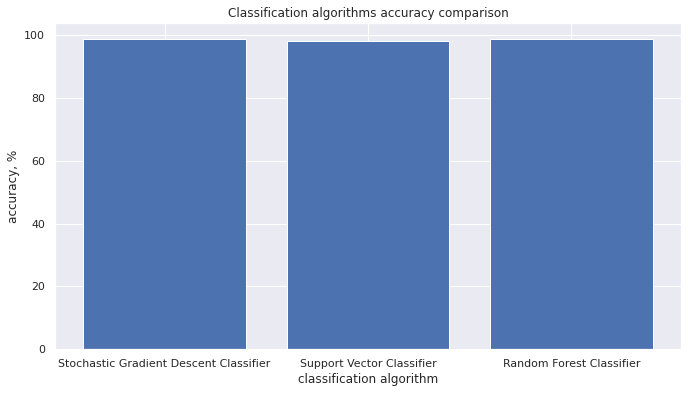

In [121]:
# draw a bar plot with comparison of accuracy for different classification algorithms

# prepare data
accuracyVals = [ 98.83, 98.21,98.83]
names = ['Stochastic Gradient Descent Classifier', 'Support Vector Classifier', 'Random Forest Classifier']

plt.figure(figsize=(10, 6))
plt.bar(names, accuracyVals)
plt.title('Classification algorithms accuracy comparison')
plt.xlabel('classification algorithm')
plt.ylabel('accuracy, %')

plt.show()

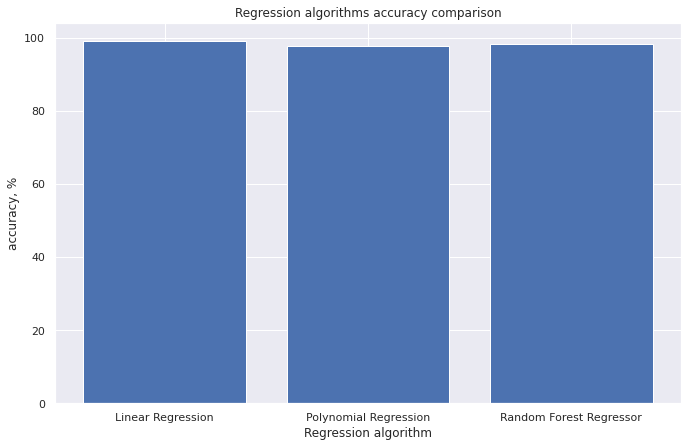

In [122]:
# draw a bar plot with comparison of accuracy for different classification algorithms

# prepare data
accuracyVals = [99.13, 97.6, 98.36]
names = ['Linear Regression', 'Polynomial Regression', 'Random Forest Regressor',]

plt.figure(figsize=(10, 7))
plt.bar(names, accuracyVals)
plt.title('Regression algorithms accuracy comparison')
plt.xlabel('Regression algorithm')
plt.ylabel('accuracy, %')

plt.show()

# **What did we get?**



*  **Most important features**:

      1.   Accounts recievable
    

*   **Cluster analysis**:

      * 9 stock changes clusters by K-Means
      * only 2 clusters from *fundamentals* analysis
      
      * Best Classifier:
          * Random Forest Classifier

*   **Best regression algorithm**
      *   Linear regression


*   **ANOVA**
      *  C (Revenue) **p-value**: 1.07*e-38;
      *  C (features) **p-value**: 2.52*e-38







